# Models Comparison for TinyML

In [82]:
# Load libraries
import numpy as np
from numpy import arange
import pickle
#
import matplotlib.pyplot as plt

#
import pandas as pd
from pandas import read_csv

from sklearn.metrics import confusion_matrix,  classification_report, f1_score
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import tensorflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from micromlgen import port
import tinymlgen as tiny

import warnings
import seaborn as sbs
import sys

warnings.filterwarnings('ignore')

In [83]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tensorflow.random.set_seed(RANDOM_SEED)
np.set_printoptions(threshold=sys.maxsize)
tasks = ["5Labels", "10Labels", "15Labels", "AllLabels"]
# Change this to change subtask
taskIndex = 3

In [84]:
with open('data/X.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y.pkl', 'rb') as f:
    y = pickle.load(f)

In [85]:
n_labels = 26
samples = 100
X = X[:n_labels*samples]
y = y[:n_labels*samples]
labels = np.unique(y)

In [86]:
classes = np.unique(y).tolist()
for i in range(len(classes)):
    y = np.where(y==classes[i], i, y)

In [88]:
y = np.array([int(el) for el in y])
print(y)

[14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)
print(X_test.shape)
print(y_test.shape)


(520, 42)
(520,)


In [90]:
X_test = X_test[:100]
X_test

array([[ 0.07, -0.03,  0.95,  0.06, -0.  ,  0.96,  0.04,  0.07,  1.01,
         0.09, -0.07,  1.11,  0.06, -0.11,  0.98,  0.09,  0.  ,  0.74,
         0.11,  0.16,  0.99,  0.04,  0.13,  1.07,  0.04,  0.1 ,  1.  ,
         0.  , -0.05,  1.  ,  0.02, -0.01,  0.97,  0.02,  0.02,  0.97,
         0.03,  0.03,  0.98,  0.06,  0.04,  0.94],
       [ 0.14,  0.04,  1.  ,  0.13,  0.05,  0.91,  0.05,  0.1 ,  0.87,
         0.08,  0.15,  1.21,  0.07,  0.2 ,  0.99,  0.14, -0.08,  0.87,
         0.09, -0.11,  0.84, -0.01, -0.07,  0.89, -0.2 ,  0.02,  1.03,
        -0.12,  0.13,  1.09, -0.15,  0.03,  0.95, -0.16,  0.04,  1.02,
        -0.13,  0.05,  0.96, -0.14,  0.02,  0.97],
       [ 0.06,  0.16,  0.97,  0.07,  0.17,  0.99,  0.05,  0.09,  1.01,
         0.11,  0.12,  0.93,  0.15,  0.18,  0.93,  0.16,  0.25,  0.89,
         0.01,  0.01,  0.84, -0.02,  0.21,  0.97, -0.09,  0.19,  1.02,
        -0.04,  0.28,  0.95, -0.05,  0.15,  0.91, -0.04,  0.13,  0.92,
        -0.  ,  0.17,  0.97, -0.01,  0.14,  0.

In [91]:
y_test = y_test[:100]
y_test

array([ 4, 24, 18, 22, 19, 15, 11, 21,  9, 25, 13, 16,  4, 18, 19,  1, 19,
       11, 21,  6,  2, 14, 18,  1, 17, 14,  3,  1,  5, 24,  2,  3,  5,  8,
       21, 20,  9, 12, 13,  4, 14, 19,  6, 25, 25, 19, 24, 21,  6,  3, 23,
        3,  9, 20, 12, 22,  5, 17,  7,  6,  5,  0, 22, 16,  7,  2, 10,  9,
        9, 20,  9,  1, 11, 12,  8, 24, 16, 14,  5, 24, 21, 17,  1, 15, 10,
       25, 17,  1,  8,  8, 25, 25, 18,  7, 12, 18,  6,  4,  7,  8])

## Model Spotting

In [92]:
# Test options and evaluation metric
num_folds = 5
seed = 42
scoring = 'f1_macro'

In [93]:
# Spot-Check Algorithms
models = []

#models.append(('XGB', XGBClassifier(random_state=seed)))
models.append(('GNB', GaussianNB(var_smoothing=2e-9)))
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('CART' , DecisionTreeClassifier(random_state=seed)))
models.append(('SVC' , SVC(gamma=0.99, random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=100, 
                                                           max_features=5, criterion='gini', max_depth=None,
                                                           min_samples_split=4, min_samples_leaf=1)))


In [94]:
# Cross Validation
results = []
names = []
for name, model in models:
    # Dividere dati in n = num_folds
    kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = np.array([])
    for train_idx, test_idx, in kf.split(X_train, y_train):
        X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
        X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
        model.fit(X_cross_train, y_cross_train)  
        y_pred = model.predict(X_cross_test)
        f1s = f1_score(y_cross_test, y_pred, average="weighted")
        cv_results = np.append(cv_results, [f1s])
    results.append(cv_results)
    names.append(name)
    #msg = "%s - %f - %f" % (name, cv_results.mean(), cv_results.std())
    msg = "{} - {:.2f} {:.2f}".format(name, cv_results.mean(), cv_results.std()).replace('.', ',')
    print(msg)

GNB - 0,81 0,02
LR - 0,84 0,01
CART - 0,64 0,02
SVC - 0,91 0,02
RF - 0,88 0,01


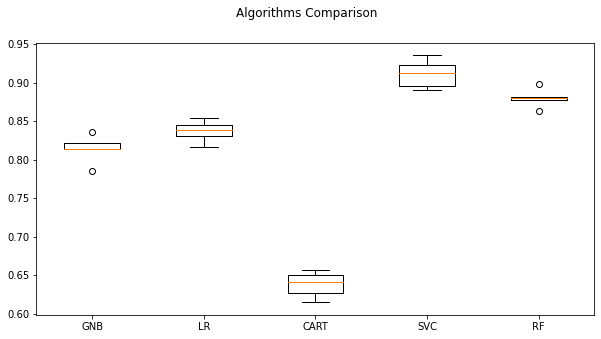

In [95]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Valutazione dei migliori algoritmi su test

## Valutazione modelli sul Test Set

In [96]:
def classification_report_csv(report, model_name):
    report_data = []
    lines = report.split('\n')
    index = 0
    row = lines[-4].split('    ')
    accuracy = row[-2] if taskIndex > 1 else row[-3]
    for line in lines[2:-5]:
        row = {}
        row_data = line.split('      ')
        row['class'] = labels[index]
        row['precision'] = float(row_data[2]) 
        row['recall'] = float(row_data[3]) 
        row['f1_score'] = float(row_data[4])
        row['accuracy'] = accuracy
        report_data.append(row)
        index += 1
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv(tasks[taskIndex] + "/classificationReports/" +'report' + model_name +  '.csv', index = False)
    
for name, model in models:
    model.fit(X_train,  y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print(f"Model {name}: ")
    report = classification_report(y_test, pred_test)
    print(report)
    classification_report_csv(report, name)
    print("-------------------------------------------------------------")

Model GNB: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.55      1.00      0.71         6
           2       0.50      0.67      0.57         3
           3       1.00      0.75      0.86         4
           4       1.00      0.75      0.86         4
           5       0.67      0.80      0.73         5
           6       1.00      0.80      0.89         5
           7       0.00      0.00      0.00         4
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         2
          11       1.00      0.67      0.80         3
          12       1.00      0.75      0.86         4
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         3
          17   

# Neural Network

In [97]:
#Hyperparameters of NN
EPOCHS = 500 
BATCH_SIZE = 7
learn_rate = 0.001
nodes = 256
def getNetwork():
    model = Sequential(name="Sequential-NN")
    model.add(layers.Dense(X.shape[1], activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.Dropout(0.25))    
    model.add(layers.Dense(nodes, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(np.unique(y).size, activation='softmax'))
    opt = Adam(learning_rate=learn_rate)
    # SGB
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

## Cross Validation NN

In [76]:
num_folds = 5

kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
cv_results = np.array([])
for train_idx, test_idx, in kf.split(X_train, y_train):
    X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
    X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
    model = getNetwork()
    model.fit(X_cross_train, y_cross_train, epochs=EPOCHS, batch_size=BATCH_SIZE)  
    y_pred = model.predict(X_cross_test)
    predictions_categorical = np.argmax(y_pred, axis=1)
    f1s = f1_score(y_cross_test, predictions_categorical, average="weighted")
    cv_results = np.append(cv_results, [f1s])

print(f'Average score of Cross Validation: {cv_results.mean()}')

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_12 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               11008     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 26)                6682      
Total params: 19,496
Trainable params: 19,496
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
238/238 [==============================] - 0s 836us/step - loss: 3.0954 - accuracy: 0.1196
Epoch 2/500


238/238 [==============================] - 0s 533us/step - loss: 0.3418 - accuracy: 0.8894
Epoch 71/500
238/238 [==============================] - 0s 517us/step - loss: 0.3275 - accuracy: 0.8954
Epoch 72/500
238/238 [==============================] - 0s 530us/step - loss: 0.3020 - accuracy: 0.9020
Epoch 73/500
238/238 [==============================] - 0s 529us/step - loss: 0.3387 - accuracy: 0.8834
Epoch 74/500
238/238 [==============================] - 0s 525us/step - loss: 0.2990 - accuracy: 0.9075
Epoch 75/500
238/238 [==============================] - 0s 522us/step - loss: 0.3114 - accuracy: 0.8942
Epoch 76/500
238/238 [==============================] - 0s 520us/step - loss: 0.2953 - accuracy: 0.8966
Epoch 77/500
238/238 [==============================] - 0s 525us/step - loss: 0.3121 - accuracy: 0.8888
Epoch 78/500
238/238 [==============================] - 0s 531us/step - loss: 0.3196 - accuracy: 0.8936
Epoch 79/500
238/238 [==============================] - 0s 534us/step - loss:

238/238 [==============================] - 0s 533us/step - loss: 0.2382 - accuracy: 0.9213
Epoch 149/500
238/238 [==============================] - 0s 518us/step - loss: 0.1968 - accuracy: 0.9345
Epoch 150/500
238/238 [==============================] - 0s 513us/step - loss: 0.2281 - accuracy: 0.9177
Epoch 151/500
238/238 [==============================] - 0s 518us/step - loss: 0.2092 - accuracy: 0.9255
Epoch 152/500
238/238 [==============================] - 0s 519us/step - loss: 0.2339 - accuracy: 0.9267
Epoch 153/500
238/238 [==============================] - 0s 534us/step - loss: 0.2186 - accuracy: 0.9303
Epoch 154/500
238/238 [==============================] - 0s 525us/step - loss: 0.1997 - accuracy: 0.9309
Epoch 155/500
238/238 [==============================] - 0s 523us/step - loss: 0.1967 - accuracy: 0.9249
Epoch 156/500
238/238 [==============================] - 0s 522us/step - loss: 0.2050 - accuracy: 0.9267
Epoch 157/500
238/238 [==============================] - 0s 518us/ste

238/238 [==============================] - 0s 548us/step - loss: 0.1861 - accuracy: 0.9399
Epoch 227/500
238/238 [==============================] - 0s 526us/step - loss: 0.1716 - accuracy: 0.9399
Epoch 228/500
238/238 [==============================] - 0s 514us/step - loss: 0.1821 - accuracy: 0.9345
Epoch 229/500
238/238 [==============================] - 0s 540us/step - loss: 0.1561 - accuracy: 0.9429
Epoch 230/500
238/238 [==============================] - 0s 523us/step - loss: 0.1526 - accuracy: 0.9537
Epoch 231/500
238/238 [==============================] - 0s 530us/step - loss: 0.1690 - accuracy: 0.9429
Epoch 232/500
238/238 [==============================] - 0s 530us/step - loss: 0.1839 - accuracy: 0.9357
Epoch 233/500
238/238 [==============================] - 0s 531us/step - loss: 0.1983 - accuracy: 0.9423
Epoch 234/500
238/238 [==============================] - 0s 519us/step - loss: 0.1838 - accuracy: 0.9387
Epoch 235/500
238/238 [==============================] - 0s 528us/ste

238/238 [==============================] - 0s 529us/step - loss: 0.1519 - accuracy: 0.9519
Epoch 305/500
238/238 [==============================] - 0s 506us/step - loss: 0.1780 - accuracy: 0.9435
Epoch 306/500
238/238 [==============================] - 0s 534us/step - loss: 0.1485 - accuracy: 0.9525
Epoch 307/500
238/238 [==============================] - 0s 524us/step - loss: 0.1713 - accuracy: 0.9477
Epoch 308/500
238/238 [==============================] - 0s 524us/step - loss: 0.1643 - accuracy: 0.9453
Epoch 309/500
238/238 [==============================] - 0s 515us/step - loss: 0.1537 - accuracy: 0.9483
Epoch 310/500
238/238 [==============================] - 0s 517us/step - loss: 0.1320 - accuracy: 0.9597
Epoch 311/500
238/238 [==============================] - 0s 531us/step - loss: 0.1478 - accuracy: 0.9471
Epoch 312/500
238/238 [==============================] - 0s 522us/step - loss: 0.1457 - accuracy: 0.9507
Epoch 313/500
238/238 [==============================] - 0s 515us/ste

238/238 [==============================] - 0s 537us/step - loss: 0.1496 - accuracy: 0.9513
Epoch 383/500
238/238 [==============================] - 0s 526us/step - loss: 0.1253 - accuracy: 0.9609
Epoch 384/500
238/238 [==============================] - 0s 533us/step - loss: 0.1564 - accuracy: 0.9441
Epoch 385/500
238/238 [==============================] - 0s 540us/step - loss: 0.1127 - accuracy: 0.9657
Epoch 386/500
238/238 [==============================] - 0s 568us/step - loss: 0.1187 - accuracy: 0.9633
Epoch 387/500
238/238 [==============================] - 0s 531us/step - loss: 0.1599 - accuracy: 0.9459
Epoch 388/500
238/238 [==============================] - 0s 537us/step - loss: 0.1492 - accuracy: 0.9531
Epoch 389/500
238/238 [==============================] - 0s 515us/step - loss: 0.1487 - accuracy: 0.9507
Epoch 390/500
238/238 [==============================] - 0s 529us/step - loss: 0.1481 - accuracy: 0.9531
Epoch 391/500
238/238 [==============================] - 0s 522us/ste

238/238 [==============================] - 0s 537us/step - loss: 0.1212 - accuracy: 0.9627
Epoch 461/500
238/238 [==============================] - 0s 517us/step - loss: 0.1617 - accuracy: 0.9483
Epoch 462/500
238/238 [==============================] - 0s 531us/step - loss: 0.1019 - accuracy: 0.9669
Epoch 463/500
238/238 [==============================] - 0s 537us/step - loss: 0.1107 - accuracy: 0.9591
Epoch 464/500
238/238 [==============================] - 0s 531us/step - loss: 0.1507 - accuracy: 0.9489
Epoch 465/500
238/238 [==============================] - 0s 508us/step - loss: 0.1417 - accuracy: 0.9507
Epoch 466/500
238/238 [==============================] - 0s 523us/step - loss: 0.1425 - accuracy: 0.9501
Epoch 467/500
238/238 [==============================] - 0s 517us/step - loss: 0.1709 - accuracy: 0.9489
Epoch 468/500
238/238 [==============================] - 0s 536us/step - loss: 0.1025 - accuracy: 0.9645
Epoch 469/500
238/238 [==============================] - 0s 521us/ste

238/238 [==============================] - 0s 510us/step - loss: 0.5612 - accuracy: 0.8245
Epoch 29/500
238/238 [==============================] - 0s 519us/step - loss: 0.5460 - accuracy: 0.8233
Epoch 30/500
238/238 [==============================] - 0s 516us/step - loss: 0.5089 - accuracy: 0.8383
Epoch 31/500
238/238 [==============================] - 0s 523us/step - loss: 0.4761 - accuracy: 0.8522
Epoch 32/500
238/238 [==============================] - 0s 524us/step - loss: 0.5018 - accuracy: 0.8401
Epoch 33/500
238/238 [==============================] - 0s 535us/step - loss: 0.4925 - accuracy: 0.8353
Epoch 34/500
238/238 [==============================] - 0s 530us/step - loss: 0.4868 - accuracy: 0.8431
Epoch 35/500
238/238 [==============================] - 0s 523us/step - loss: 0.4795 - accuracy: 0.8498
Epoch 36/500
238/238 [==============================] - 0s 519us/step - loss: 0.4598 - accuracy: 0.8540
Epoch 37/500
238/238 [==============================] - 0s 528us/step - loss:

238/238 [==============================] - 0s 529us/step - loss: 0.2074 - accuracy: 0.9273
Epoch 107/500
238/238 [==============================] - 0s 515us/step - loss: 0.2367 - accuracy: 0.9171
Epoch 108/500
238/238 [==============================] - 0s 525us/step - loss: 0.2184 - accuracy: 0.9249
Epoch 109/500
238/238 [==============================] - 0s 520us/step - loss: 0.1847 - accuracy: 0.9357
Epoch 110/500
238/238 [==============================] - 0s 516us/step - loss: 0.2471 - accuracy: 0.9249
Epoch 111/500
238/238 [==============================] - 0s 540us/step - loss: 0.2446 - accuracy: 0.9117
Epoch 112/500
238/238 [==============================] - 0s 528us/step - loss: 0.2029 - accuracy: 0.9357
Epoch 113/500
238/238 [==============================] - 0s 523us/step - loss: 0.2298 - accuracy: 0.9195
Epoch 114/500
238/238 [==============================] - 0s 531us/step - loss: 0.2111 - accuracy: 0.9207
Epoch 115/500
238/238 [==============================] - 0s 511us/ste

238/238 [==============================] - 0s 528us/step - loss: 0.1787 - accuracy: 0.9375
Epoch 185/500
238/238 [==============================] - 0s 518us/step - loss: 0.2171 - accuracy: 0.9207
Epoch 186/500
238/238 [==============================] - 0s 523us/step - loss: 0.1612 - accuracy: 0.9423
Epoch 187/500
238/238 [==============================] - 0s 526us/step - loss: 0.1539 - accuracy: 0.9483
Epoch 188/500
238/238 [==============================] - 0s 519us/step - loss: 0.1624 - accuracy: 0.9447
Epoch 189/500
238/238 [==============================] - 0s 527us/step - loss: 0.1590 - accuracy: 0.9459
Epoch 190/500
238/238 [==============================] - 0s 514us/step - loss: 0.1795 - accuracy: 0.9417
Epoch 191/500
238/238 [==============================] - 0s 526us/step - loss: 0.1924 - accuracy: 0.9399
Epoch 192/500
238/238 [==============================] - 0s 522us/step - loss: 0.1760 - accuracy: 0.9381
Epoch 193/500
238/238 [==============================] - 0s 529us/ste

238/238 [==============================] - 0s 525us/step - loss: 0.1463 - accuracy: 0.9519
Epoch 263/500
238/238 [==============================] - 0s 524us/step - loss: 0.1432 - accuracy: 0.9423
Epoch 264/500
238/238 [==============================] - 0s 523us/step - loss: 0.1584 - accuracy: 0.9477
Epoch 265/500
238/238 [==============================] - 0s 519us/step - loss: 0.1529 - accuracy: 0.9465
Epoch 266/500
238/238 [==============================] - 0s 527us/step - loss: 0.1417 - accuracy: 0.9483
Epoch 267/500
238/238 [==============================] - 0s 520us/step - loss: 0.1586 - accuracy: 0.9465
Epoch 268/500
238/238 [==============================] - 0s 515us/step - loss: 0.1499 - accuracy: 0.9441
Epoch 269/500
238/238 [==============================] - 0s 522us/step - loss: 0.1480 - accuracy: 0.9519
Epoch 270/500
238/238 [==============================] - 0s 519us/step - loss: 0.1610 - accuracy: 0.9471
Epoch 271/500
238/238 [==============================] - 0s 529us/ste

238/238 [==============================] - 0s 542us/step - loss: 0.1527 - accuracy: 0.9483
Epoch 341/500
238/238 [==============================] - 0s 522us/step - loss: 0.1208 - accuracy: 0.9591
Epoch 342/500
238/238 [==============================] - 0s 533us/step - loss: 0.1449 - accuracy: 0.9549
Epoch 343/500
238/238 [==============================] - 0s 519us/step - loss: 0.1338 - accuracy: 0.9615
Epoch 344/500
238/238 [==============================] - 0s 523us/step - loss: 0.1551 - accuracy: 0.9489
Epoch 345/500
238/238 [==============================] - 0s 523us/step - loss: 0.1275 - accuracy: 0.9609
Epoch 346/500
238/238 [==============================] - 0s 516us/step - loss: 0.1387 - accuracy: 0.9537
Epoch 347/500
238/238 [==============================] - 0s 514us/step - loss: 0.1511 - accuracy: 0.9501
Epoch 348/500
238/238 [==============================] - 0s 521us/step - loss: 0.1269 - accuracy: 0.9561
Epoch 349/500
238/238 [==============================] - 0s 526us/ste

238/238 [==============================] - 0s 528us/step - loss: 0.1614 - accuracy: 0.9465
Epoch 419/500
238/238 [==============================] - 0s 532us/step - loss: 0.1186 - accuracy: 0.9621
Epoch 420/500
238/238 [==============================] - 0s 530us/step - loss: 0.1246 - accuracy: 0.9561
Epoch 421/500
238/238 [==============================] - 0s 521us/step - loss: 0.1192 - accuracy: 0.9567
Epoch 422/500
238/238 [==============================] - 0s 532us/step - loss: 0.1341 - accuracy: 0.9597
Epoch 423/500
238/238 [==============================] - 0s 526us/step - loss: 0.1167 - accuracy: 0.9627
Epoch 424/500
238/238 [==============================] - 0s 522us/step - loss: 0.1504 - accuracy: 0.9495
Epoch 425/500
238/238 [==============================] - 0s 522us/step - loss: 0.1285 - accuracy: 0.9585
Epoch 426/500
238/238 [==============================] - 0s 522us/step - loss: 0.1130 - accuracy: 0.9603
Epoch 427/500
238/238 [==============================] - 0s 521us/ste

238/238 [==============================] - 0s 557us/step - loss: 0.1548 - accuracy: 0.9591
Epoch 497/500
238/238 [==============================] - 0s 518us/step - loss: 0.1081 - accuracy: 0.9585
Epoch 498/500
238/238 [==============================] - 0s 538us/step - loss: 0.1174 - accuracy: 0.9621
Epoch 499/500
238/238 [==============================] - 0s 523us/step - loss: 0.1141 - accuracy: 0.9645
Epoch 500/500
238/238 [==============================] - 0s 527us/step - loss: 0.1072 - accuracy: 0.9603
Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_16 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               11008     
____

238/238 [==============================] - 0s 519us/step - loss: 0.3259 - accuracy: 0.8816
Epoch 66/500
238/238 [==============================] - 0s 521us/step - loss: 0.3368 - accuracy: 0.8954
Epoch 67/500
238/238 [==============================] - 0s 520us/step - loss: 0.3393 - accuracy: 0.8930
Epoch 68/500
238/238 [==============================] - 0s 525us/step - loss: 0.3297 - accuracy: 0.8864
Epoch 69/500
238/238 [==============================] - 0s 517us/step - loss: 0.3350 - accuracy: 0.8786
Epoch 70/500
238/238 [==============================] - 0s 513us/step - loss: 0.3091 - accuracy: 0.8978
Epoch 71/500
238/238 [==============================] - 0s 532us/step - loss: 0.3224 - accuracy: 0.8990
Epoch 72/500
238/238 [==============================] - 0s 528us/step - loss: 0.3437 - accuracy: 0.8846
Epoch 73/500
238/238 [==============================] - 0s 508us/step - loss: 0.3028 - accuracy: 0.8954
Epoch 74/500
238/238 [==============================] - 0s 537us/step - loss:

238/238 [==============================] - 0s 517us/step - loss: 0.2214 - accuracy: 0.9303
Epoch 144/500
238/238 [==============================] - 0s 517us/step - loss: 0.2234 - accuracy: 0.9207
Epoch 145/500
238/238 [==============================] - 0s 527us/step - loss: 0.2016 - accuracy: 0.9291
Epoch 146/500
238/238 [==============================] - 0s 514us/step - loss: 0.2130 - accuracy: 0.9339
Epoch 147/500
238/238 [==============================] - 0s 520us/step - loss: 0.2254 - accuracy: 0.9273
Epoch 148/500
238/238 [==============================] - 0s 513us/step - loss: 0.2099 - accuracy: 0.9273
Epoch 149/500
238/238 [==============================] - 0s 526us/step - loss: 0.2105 - accuracy: 0.9243
Epoch 150/500
238/238 [==============================] - 0s 513us/step - loss: 0.1955 - accuracy: 0.9279
Epoch 151/500
238/238 [==============================] - 0s 519us/step - loss: 0.2248 - accuracy: 0.9261
Epoch 152/500
238/238 [==============================] - 0s 519us/ste

238/238 [==============================] - 0s 517us/step - loss: 0.1966 - accuracy: 0.9333
Epoch 222/500
238/238 [==============================] - 0s 521us/step - loss: 0.1655 - accuracy: 0.9345
Epoch 223/500
238/238 [==============================] - 0s 511us/step - loss: 0.1736 - accuracy: 0.9453
Epoch 224/500
238/238 [==============================] - 0s 510us/step - loss: 0.1555 - accuracy: 0.9447
Epoch 225/500
238/238 [==============================] - 0s 522us/step - loss: 0.1830 - accuracy: 0.9369
Epoch 226/500
238/238 [==============================] - 0s 524us/step - loss: 0.1743 - accuracy: 0.9411
Epoch 227/500
238/238 [==============================] - 0s 518us/step - loss: 0.1922 - accuracy: 0.9327
Epoch 228/500
238/238 [==============================] - 0s 514us/step - loss: 0.1775 - accuracy: 0.9471
Epoch 229/500
238/238 [==============================] - 0s 525us/step - loss: 0.1834 - accuracy: 0.9363
Epoch 230/500
238/238 [==============================] - 0s 516us/ste

238/238 [==============================] - 0s 527us/step - loss: 0.1713 - accuracy: 0.9435
Epoch 300/500
238/238 [==============================] - 0s 517us/step - loss: 0.1332 - accuracy: 0.9513
Epoch 301/500
238/238 [==============================] - 0s 522us/step - loss: 0.1623 - accuracy: 0.9471
Epoch 302/500
238/238 [==============================] - 0s 520us/step - loss: 0.1361 - accuracy: 0.9525
Epoch 303/500
238/238 [==============================] - 0s 515us/step - loss: 0.1547 - accuracy: 0.9465
Epoch 304/500
238/238 [==============================] - 0s 528us/step - loss: 0.1450 - accuracy: 0.9453
Epoch 305/500
238/238 [==============================] - 0s 521us/step - loss: 0.1750 - accuracy: 0.9435
Epoch 306/500
238/238 [==============================] - 0s 523us/step - loss: 0.1376 - accuracy: 0.9513
Epoch 307/500
238/238 [==============================] - 0s 514us/step - loss: 0.1483 - accuracy: 0.9495
Epoch 308/500
238/238 [==============================] - 0s 534us/ste

238/238 [==============================] - 0s 518us/step - loss: 0.1103 - accuracy: 0.9663
Epoch 378/500
238/238 [==============================] - 0s 517us/step - loss: 0.1345 - accuracy: 0.9543
Epoch 379/500
238/238 [==============================] - 0s 524us/step - loss: 0.1539 - accuracy: 0.9501
Epoch 380/500
238/238 [==============================] - 0s 515us/step - loss: 0.1228 - accuracy: 0.9579
Epoch 381/500
238/238 [==============================] - 0s 520us/step - loss: 0.1567 - accuracy: 0.9471
Epoch 382/500
238/238 [==============================] - 0s 511us/step - loss: 0.1335 - accuracy: 0.9603
Epoch 383/500
238/238 [==============================] - 0s 521us/step - loss: 0.1080 - accuracy: 0.9633
Epoch 384/500
238/238 [==============================] - 0s 523us/step - loss: 0.1550 - accuracy: 0.9519
Epoch 385/500
238/238 [==============================] - 0s 518us/step - loss: 0.1450 - accuracy: 0.9459
Epoch 386/500
238/238 [==============================] - 0s 517us/ste

238/238 [==============================] - 0s 518us/step - loss: 0.1168 - accuracy: 0.9597
Epoch 456/500
238/238 [==============================] - 0s 504us/step - loss: 0.1259 - accuracy: 0.9591
Epoch 457/500
238/238 [==============================] - 0s 521us/step - loss: 0.1131 - accuracy: 0.9645
Epoch 458/500
238/238 [==============================] - 0s 505us/step - loss: 0.1140 - accuracy: 0.9609
Epoch 459/500
238/238 [==============================] - 0s 518us/step - loss: 0.1882 - accuracy: 0.9399
Epoch 460/500
238/238 [==============================] - 0s 510us/step - loss: 0.1255 - accuracy: 0.9579
Epoch 461/500
238/238 [==============================] - 0s 517us/step - loss: 0.1165 - accuracy: 0.9645
Epoch 462/500
238/238 [==============================] - 0s 509us/step - loss: 0.1251 - accuracy: 0.9597
Epoch 463/500
238/238 [==============================] - 0s 521us/step - loss: 0.1464 - accuracy: 0.9489
Epoch 464/500
238/238 [==============================] - 0s 520us/ste

238/238 [==============================] - 0s 515us/step - loss: 0.6253 - accuracy: 0.8005
Epoch 24/500
238/238 [==============================] - 0s 522us/step - loss: 0.6146 - accuracy: 0.7981
Epoch 25/500
238/238 [==============================] - 0s 513us/step - loss: 0.6295 - accuracy: 0.7981
Epoch 26/500
238/238 [==============================] - 0s 517us/step - loss: 0.5753 - accuracy: 0.8239
Epoch 27/500
238/238 [==============================] - 0s 509us/step - loss: 0.5627 - accuracy: 0.8275
Epoch 28/500
238/238 [==============================] - 0s 532us/step - loss: 0.5518 - accuracy: 0.8125
Epoch 29/500
238/238 [==============================] - 0s 516us/step - loss: 0.5369 - accuracy: 0.8293
Epoch 30/500
238/238 [==============================] - 0s 516us/step - loss: 0.5390 - accuracy: 0.8299
Epoch 31/500
238/238 [==============================] - 0s 526us/step - loss: 0.5122 - accuracy: 0.8347
Epoch 32/500
238/238 [==============================] - 0s 514us/step - loss:

238/238 [==============================] - 0s 526us/step - loss: 0.2655 - accuracy: 0.9105
Epoch 102/500
238/238 [==============================] - 0s 515us/step - loss: 0.2929 - accuracy: 0.9087
Epoch 103/500
238/238 [==============================] - 0s 518us/step - loss: 0.2653 - accuracy: 0.9081
Epoch 104/500
238/238 [==============================] - 0s 519us/step - loss: 0.2816 - accuracy: 0.9002
Epoch 105/500
238/238 [==============================] - 0s 523us/step - loss: 0.2737 - accuracy: 0.9123
Epoch 106/500
238/238 [==============================] - 0s 532us/step - loss: 0.2588 - accuracy: 0.9069
Epoch 107/500
238/238 [==============================] - 0s 521us/step - loss: 0.2851 - accuracy: 0.9014
Epoch 108/500
238/238 [==============================] - 0s 527us/step - loss: 0.2845 - accuracy: 0.8996
Epoch 109/500
238/238 [==============================] - 0s 516us/step - loss: 0.2499 - accuracy: 0.9123
Epoch 110/500
238/238 [==============================] - 0s 518us/ste

238/238 [==============================] - 0s 519us/step - loss: 0.1760 - accuracy: 0.9405
Epoch 180/500
238/238 [==============================] - 0s 523us/step - loss: 0.2309 - accuracy: 0.9315
Epoch 181/500
238/238 [==============================] - 0s 517us/step - loss: 0.1971 - accuracy: 0.9285
Epoch 182/500
238/238 [==============================] - 0s 532us/step - loss: 0.2293 - accuracy: 0.9249
Epoch 183/500
238/238 [==============================] - 0s 528us/step - loss: 0.2071 - accuracy: 0.9273
Epoch 184/500
238/238 [==============================] - 0s 526us/step - loss: 0.2081 - accuracy: 0.9309
Epoch 185/500
238/238 [==============================] - 0s 527us/step - loss: 0.2143 - accuracy: 0.9309
Epoch 186/500
238/238 [==============================] - 0s 605us/step - loss: 0.2210 - accuracy: 0.9231
Epoch 187/500
238/238 [==============================] - 0s 528us/step - loss: 0.2133 - accuracy: 0.9255
Epoch 188/500
238/238 [==============================] - 0s 573us/ste

238/238 [==============================] - 0s 521us/step - loss: 0.1706 - accuracy: 0.9417
Epoch 258/500
238/238 [==============================] - 0s 523us/step - loss: 0.1709 - accuracy: 0.9435
Epoch 259/500
238/238 [==============================] - 0s 525us/step - loss: 0.1740 - accuracy: 0.9423
Epoch 260/500
238/238 [==============================] - 0s 513us/step - loss: 0.1909 - accuracy: 0.9345
Epoch 261/500
238/238 [==============================] - 0s 528us/step - loss: 0.1835 - accuracy: 0.9339
Epoch 262/500
238/238 [==============================] - 0s 527us/step - loss: 0.1782 - accuracy: 0.9411
Epoch 263/500
238/238 [==============================] - 0s 513us/step - loss: 0.1624 - accuracy: 0.9441
Epoch 264/500
238/238 [==============================] - 0s 527us/step - loss: 0.1634 - accuracy: 0.9447
Epoch 265/500
238/238 [==============================] - 0s 532us/step - loss: 0.1477 - accuracy: 0.9531
Epoch 266/500
238/238 [==============================] - 0s 521us/ste

238/238 [==============================] - 0s 521us/step - loss: 0.1393 - accuracy: 0.9567
Epoch 336/500
238/238 [==============================] - 0s 530us/step - loss: 0.1634 - accuracy: 0.9435
Epoch 337/500
238/238 [==============================] - 0s 524us/step - loss: 0.1343 - accuracy: 0.9501
Epoch 338/500
238/238 [==============================] - 0s 517us/step - loss: 0.1890 - accuracy: 0.9393
Epoch 339/500
238/238 [==============================] - 0s 543us/step - loss: 0.1529 - accuracy: 0.9501
Epoch 340/500
238/238 [==============================] - 0s 526us/step - loss: 0.1451 - accuracy: 0.9531
Epoch 341/500
238/238 [==============================] - 0s 521us/step - loss: 0.1362 - accuracy: 0.9537
Epoch 342/500
238/238 [==============================] - 0s 523us/step - loss: 0.1800 - accuracy: 0.9411
Epoch 343/500
238/238 [==============================] - 0s 523us/step - loss: 0.1547 - accuracy: 0.9543
Epoch 344/500
238/238 [==============================] - 0s 522us/ste

238/238 [==============================] - 0s 510us/step - loss: 0.1596 - accuracy: 0.9453
Epoch 414/500
238/238 [==============================] - 0s 522us/step - loss: 0.1716 - accuracy: 0.9423
Epoch 415/500
238/238 [==============================] - 0s 517us/step - loss: 0.1401 - accuracy: 0.9507
Epoch 416/500
238/238 [==============================] - 0s 523us/step - loss: 0.1503 - accuracy: 0.9453
Epoch 417/500
238/238 [==============================] - 0s 521us/step - loss: 0.1435 - accuracy: 0.9525
Epoch 418/500
238/238 [==============================] - 0s 528us/step - loss: 0.1579 - accuracy: 0.9489
Epoch 419/500
238/238 [==============================] - 0s 527us/step - loss: 0.1568 - accuracy: 0.9489
Epoch 420/500
238/238 [==============================] - 0s 523us/step - loss: 0.1435 - accuracy: 0.9519
Epoch 421/500
238/238 [==============================] - 0s 521us/step - loss: 0.1536 - accuracy: 0.9471
Epoch 422/500
238/238 [==============================] - 0s 518us/ste

238/238 [==============================] - 0s 524us/step - loss: 0.1332 - accuracy: 0.9573
Epoch 492/500
238/238 [==============================] - 0s 528us/step - loss: 0.1491 - accuracy: 0.9489
Epoch 493/500
238/238 [==============================] - 0s 518us/step - loss: 0.1379 - accuracy: 0.9495
Epoch 494/500
238/238 [==============================] - 0s 526us/step - loss: 0.1166 - accuracy: 0.9615
Epoch 495/500
238/238 [==============================] - 0s 531us/step - loss: 0.1340 - accuracy: 0.9615
Epoch 496/500
238/238 [==============================] - 0s 518us/step - loss: 0.1322 - accuracy: 0.9579
Epoch 497/500
238/238 [==============================] - 0s 535us/step - loss: 0.1383 - accuracy: 0.9537
Epoch 498/500
238/238 [==============================] - 0s 520us/step - loss: 0.1301 - accuracy: 0.9555
Epoch 499/500
238/238 [==============================] - 0s 523us/step - loss: 0.1365 - accuracy: 0.9537
Epoch 500/500
238/238 [==============================] - 0s 523us/ste

238/238 [==============================] - 0s 511us/step - loss: 0.3476 - accuracy: 0.8834
Epoch 61/500
238/238 [==============================] - 0s 522us/step - loss: 0.3172 - accuracy: 0.8936
Epoch 62/500
238/238 [==============================] - 0s 526us/step - loss: 0.3478 - accuracy: 0.8774
Epoch 63/500
238/238 [==============================] - 0s 519us/step - loss: 0.3294 - accuracy: 0.8954
Epoch 64/500
238/238 [==============================] - 0s 519us/step - loss: 0.3223 - accuracy: 0.8960
Epoch 65/500
238/238 [==============================] - 0s 511us/step - loss: 0.2964 - accuracy: 0.9002
Epoch 66/500
238/238 [==============================] - 0s 518us/step - loss: 0.3271 - accuracy: 0.8930
Epoch 67/500
238/238 [==============================] - 0s 531us/step - loss: 0.2997 - accuracy: 0.9087
Epoch 68/500
238/238 [==============================] - 0s 525us/step - loss: 0.3182 - accuracy: 0.8966
Epoch 69/500
238/238 [==============================] - 0s 509us/step - loss:

238/238 [==============================] - 0s 549us/step - loss: 0.2288 - accuracy: 0.9219
Epoch 139/500
238/238 [==============================] - 0s 520us/step - loss: 0.1985 - accuracy: 0.9351
Epoch 140/500
238/238 [==============================] - 0s 505us/step - loss: 0.2227 - accuracy: 0.9273
Epoch 141/500
238/238 [==============================] - 0s 537us/step - loss: 0.2013 - accuracy: 0.9351
Epoch 142/500
238/238 [==============================] - 0s 517us/step - loss: 0.1812 - accuracy: 0.9351
Epoch 143/500
238/238 [==============================] - 0s 514us/step - loss: 0.2251 - accuracy: 0.9219
Epoch 144/500
238/238 [==============================] - 0s 525us/step - loss: 0.2189 - accuracy: 0.9219
Epoch 145/500
238/238 [==============================] - 0s 521us/step - loss: 0.2105 - accuracy: 0.9315
Epoch 146/500
238/238 [==============================] - 0s 523us/step - loss: 0.1873 - accuracy: 0.9303
Epoch 147/500
238/238 [==============================] - 0s 531us/ste

238/238 [==============================] - 0s 546us/step - loss: 0.1686 - accuracy: 0.9429
Epoch 217/500
238/238 [==============================] - 0s 524us/step - loss: 0.1836 - accuracy: 0.9393
Epoch 218/500
238/238 [==============================] - 0s 532us/step - loss: 0.1638 - accuracy: 0.9483
Epoch 219/500
238/238 [==============================] - 0s 517us/step - loss: 0.1594 - accuracy: 0.9471
Epoch 220/500
238/238 [==============================] - 0s 523us/step - loss: 0.1573 - accuracy: 0.9453
Epoch 221/500
238/238 [==============================] - 0s 517us/step - loss: 0.1561 - accuracy: 0.9447
Epoch 222/500
238/238 [==============================] - 0s 526us/step - loss: 0.1801 - accuracy: 0.9471
Epoch 223/500
238/238 [==============================] - 0s 516us/step - loss: 0.1700 - accuracy: 0.9447
Epoch 224/500
238/238 [==============================] - 0s 522us/step - loss: 0.1933 - accuracy: 0.9339
Epoch 225/500
238/238 [==============================] - 0s 510us/ste

238/238 [==============================] - 0s 523us/step - loss: 0.1480 - accuracy: 0.9495
Epoch 295/500
238/238 [==============================] - 0s 544us/step - loss: 0.1243 - accuracy: 0.9543
Epoch 296/500
238/238 [==============================] - 0s 519us/step - loss: 0.1302 - accuracy: 0.9537
Epoch 297/500
238/238 [==============================] - 0s 532us/step - loss: 0.1481 - accuracy: 0.9513
Epoch 298/500
238/238 [==============================] - 0s 531us/step - loss: 0.1296 - accuracy: 0.9561
Epoch 299/500
238/238 [==============================] - 0s 529us/step - loss: 0.1753 - accuracy: 0.9363
Epoch 300/500
238/238 [==============================] - 0s 526us/step - loss: 0.1811 - accuracy: 0.9417
Epoch 301/500
238/238 [==============================] - 0s 523us/step - loss: 0.1468 - accuracy: 0.9501
Epoch 302/500
238/238 [==============================] - 0s 524us/step - loss: 0.1281 - accuracy: 0.9543
Epoch 303/500
238/238 [==============================] - 0s 521us/ste

238/238 [==============================] - 0s 529us/step - loss: 0.1415 - accuracy: 0.9567
Epoch 373/500
238/238 [==============================] - 0s 512us/step - loss: 0.1329 - accuracy: 0.9537
Epoch 374/500
238/238 [==============================] - 0s 546us/step - loss: 0.1429 - accuracy: 0.9537
Epoch 375/500
238/238 [==============================] - 0s 524us/step - loss: 0.1206 - accuracy: 0.9621
Epoch 376/500
238/238 [==============================] - 0s 516us/step - loss: 0.1177 - accuracy: 0.9597
Epoch 377/500
238/238 [==============================] - 0s 523us/step - loss: 0.1354 - accuracy: 0.9567
Epoch 378/500
238/238 [==============================] - 0s 514us/step - loss: 0.1264 - accuracy: 0.9567
Epoch 379/500
238/238 [==============================] - 0s 523us/step - loss: 0.1422 - accuracy: 0.9525
Epoch 380/500
238/238 [==============================] - 0s 545us/step - loss: 0.1232 - accuracy: 0.9615
Epoch 381/500
238/238 [==============================] - 0s 521us/ste

238/238 [==============================] - 0s 509us/step - loss: 0.1235 - accuracy: 0.9561
Epoch 451/500
238/238 [==============================] - 0s 513us/step - loss: 0.1209 - accuracy: 0.9591
Epoch 452/500
238/238 [==============================] - 0s 515us/step - loss: 0.1104 - accuracy: 0.9621
Epoch 453/500
238/238 [==============================] - 0s 547us/step - loss: 0.1356 - accuracy: 0.9579
Epoch 454/500
238/238 [==============================] - 0s 560us/step - loss: 0.1370 - accuracy: 0.9543
Epoch 455/500
238/238 [==============================] - 0s 518us/step - loss: 0.1477 - accuracy: 0.9573
Epoch 456/500
238/238 [==============================] - 0s 515us/step - loss: 0.1271 - accuracy: 0.9603
Epoch 457/500
238/238 [==============================] - 0s 519us/step - loss: 0.1519 - accuracy: 0.9585
Epoch 458/500
238/238 [==============================] - 0s 523us/step - loss: 0.1054 - accuracy: 0.9633
Epoch 459/500
238/238 [==============================] - 0s 523us/ste

## Train and Test

In [98]:
model = getNetwork()
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.25)

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_24 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               11008     
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 26)                6682      
Total params: 19,496
Trainable params: 19,496
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
223/223 [==============================] - 0s 1ms/step - loss: 3.0974 - accuracy: 0.1244 - val_loss: 2.

223/223 [==============================] - 0s 762us/step - loss: 0.4402 - accuracy: 0.8558 - val_loss: 0.3993 - val_accuracy: 0.9058
Epoch 51/500
223/223 [==============================] - 0s 761us/step - loss: 0.4174 - accuracy: 0.8673 - val_loss: 0.4020 - val_accuracy: 0.9096
Epoch 52/500
223/223 [==============================] - 0s 755us/step - loss: 0.4398 - accuracy: 0.8647 - val_loss: 0.3687 - val_accuracy: 0.9154
Epoch 53/500
223/223 [==============================] - 0s 760us/step - loss: 0.4175 - accuracy: 0.8667 - val_loss: 0.3854 - val_accuracy: 0.9058
Epoch 54/500
223/223 [==============================] - 0s 765us/step - loss: 0.4044 - accuracy: 0.8564 - val_loss: 0.4190 - val_accuracy: 0.9000
Epoch 55/500
223/223 [==============================] - 0s 810us/step - loss: 0.4046 - accuracy: 0.8654 - val_loss: 0.3861 - val_accuracy: 0.9173
Epoch 56/500
223/223 [==============================] - 0s 806us/step - loss: 0.4195 - accuracy: 0.8571 - val_loss: 0.3751 - val_accuracy

223/223 [==============================] - 0s 767us/step - loss: 0.2972 - accuracy: 0.9000 - val_loss: 0.3843 - val_accuracy: 0.9212
Epoch 107/500
223/223 [==============================] - 0s 758us/step - loss: 0.2742 - accuracy: 0.9064 - val_loss: 0.3587 - val_accuracy: 0.9288
Epoch 108/500
223/223 [==============================] - 0s 767us/step - loss: 0.2930 - accuracy: 0.8987 - val_loss: 0.3637 - val_accuracy: 0.9154
Epoch 109/500
223/223 [==============================] - 0s 759us/step - loss: 0.2836 - accuracy: 0.9090 - val_loss: 0.3639 - val_accuracy: 0.9250
Epoch 110/500
223/223 [==============================] - 0s 775us/step - loss: 0.3148 - accuracy: 0.8942 - val_loss: 0.3617 - val_accuracy: 0.9231
Epoch 111/500
223/223 [==============================] - 0s 760us/step - loss: 0.2728 - accuracy: 0.8994 - val_loss: 0.4005 - val_accuracy: 0.9173
Epoch 112/500
223/223 [==============================] - 0s 769us/step - loss: 0.2828 - accuracy: 0.9006 - val_loss: 0.3749 - val_ac

Epoch 162/500
223/223 [==============================] - 0s 841us/step - loss: 0.2228 - accuracy: 0.9288 - val_loss: 0.3518 - val_accuracy: 0.9327
Epoch 163/500
223/223 [==============================] - 0s 856us/step - loss: 0.2000 - accuracy: 0.9333 - val_loss: 0.3577 - val_accuracy: 0.9308
Epoch 164/500
223/223 [==============================] - 0s 842us/step - loss: 0.2257 - accuracy: 0.9269 - val_loss: 0.3652 - val_accuracy: 0.9173
Epoch 165/500
223/223 [==============================] - 0s 799us/step - loss: 0.2709 - accuracy: 0.9122 - val_loss: 0.3848 - val_accuracy: 0.9269
Epoch 166/500
223/223 [==============================] - 0s 777us/step - loss: 0.2090 - accuracy: 0.9301 - val_loss: 0.4278 - val_accuracy: 0.9212
Epoch 167/500
223/223 [==============================] - 0s 794us/step - loss: 0.2204 - accuracy: 0.9179 - val_loss: 0.3719 - val_accuracy: 0.9231
Epoch 168/500
223/223 [==============================] - 0s 841us/step - loss: 0.2179 - accuracy: 0.9301 - val_loss: 0

Epoch 218/500
223/223 [==============================] - 0s 789us/step - loss: 0.1996 - accuracy: 0.9263 - val_loss: 0.3452 - val_accuracy: 0.9288
Epoch 219/500
223/223 [==============================] - 0s 768us/step - loss: 0.1713 - accuracy: 0.9474 - val_loss: 0.3509 - val_accuracy: 0.9404
Epoch 220/500
223/223 [==============================] - 0s 796us/step - loss: 0.1839 - accuracy: 0.9314 - val_loss: 0.3621 - val_accuracy: 0.9308
Epoch 221/500
223/223 [==============================] - 0s 794us/step - loss: 0.1984 - accuracy: 0.9391 - val_loss: 0.3392 - val_accuracy: 0.9404
Epoch 222/500
223/223 [==============================] - 0s 814us/step - loss: 0.1903 - accuracy: 0.9417 - val_loss: 0.3575 - val_accuracy: 0.9231
Epoch 223/500
223/223 [==============================] - 0s 851us/step - loss: 0.2211 - accuracy: 0.9301 - val_loss: 0.3594 - val_accuracy: 0.9327
Epoch 224/500
223/223 [==============================] - 0s 771us/step - loss: 0.2043 - accuracy: 0.9301 - val_loss: 0

Epoch 274/500
223/223 [==============================] - 0s 754us/step - loss: 0.1749 - accuracy: 0.9391 - val_loss: 0.3813 - val_accuracy: 0.9231
Epoch 275/500
223/223 [==============================] - 0s 751us/step - loss: 0.1999 - accuracy: 0.9333 - val_loss: 0.3859 - val_accuracy: 0.9308
Epoch 276/500
223/223 [==============================] - 0s 759us/step - loss: 0.1656 - accuracy: 0.9500 - val_loss: 0.4062 - val_accuracy: 0.9250
Epoch 277/500
223/223 [==============================] - 0s 766us/step - loss: 0.1692 - accuracy: 0.9481 - val_loss: 0.4209 - val_accuracy: 0.9269
Epoch 278/500
223/223 [==============================] - 0s 754us/step - loss: 0.1699 - accuracy: 0.9417 - val_loss: 0.3855 - val_accuracy: 0.9346
Epoch 279/500
223/223 [==============================] - 0s 762us/step - loss: 0.2157 - accuracy: 0.9308 - val_loss: 0.3906 - val_accuracy: 0.9365
Epoch 280/500
223/223 [==============================] - 0s 788us/step - loss: 0.1677 - accuracy: 0.9494 - val_loss: 0

Epoch 330/500
223/223 [==============================] - 0s 771us/step - loss: 0.1775 - accuracy: 0.9378 - val_loss: 0.4431 - val_accuracy: 0.9346
Epoch 331/500
223/223 [==============================] - 0s 779us/step - loss: 0.1737 - accuracy: 0.9378 - val_loss: 0.4806 - val_accuracy: 0.9288
Epoch 332/500
223/223 [==============================] - 0s 756us/step - loss: 0.1685 - accuracy: 0.9455 - val_loss: 0.4400 - val_accuracy: 0.9212
Epoch 333/500
223/223 [==============================] - 0s 763us/step - loss: 0.1705 - accuracy: 0.9449 - val_loss: 0.3954 - val_accuracy: 0.9404
Epoch 334/500
223/223 [==============================] - 0s 772us/step - loss: 0.1587 - accuracy: 0.9481 - val_loss: 0.4232 - val_accuracy: 0.9327
Epoch 335/500
223/223 [==============================] - 0s 759us/step - loss: 0.1698 - accuracy: 0.9429 - val_loss: 0.4077 - val_accuracy: 0.9385
Epoch 336/500
223/223 [==============================] - 0s 767us/step - loss: 0.1764 - accuracy: 0.9462 - val_loss: 0

Epoch 386/500
223/223 [==============================] - 0s 781us/step - loss: 0.1504 - accuracy: 0.9474 - val_loss: 0.3997 - val_accuracy: 0.9250
Epoch 387/500
223/223 [==============================] - 0s 766us/step - loss: 0.1586 - accuracy: 0.9481 - val_loss: 0.5274 - val_accuracy: 0.9000
Epoch 388/500
223/223 [==============================] - 0s 778us/step - loss: 0.1646 - accuracy: 0.9468 - val_loss: 0.4289 - val_accuracy: 0.9346
Epoch 389/500
223/223 [==============================] - 0s 762us/step - loss: 0.1445 - accuracy: 0.9558 - val_loss: 0.4120 - val_accuracy: 0.9346
Epoch 390/500
223/223 [==============================] - 0s 777us/step - loss: 0.1635 - accuracy: 0.9455 - val_loss: 0.4214 - val_accuracy: 0.9288
Epoch 391/500
223/223 [==============================] - 0s 762us/step - loss: 0.1502 - accuracy: 0.9513 - val_loss: 0.4451 - val_accuracy: 0.9231
Epoch 392/500
223/223 [==============================] - 0s 769us/step - loss: 0.1792 - accuracy: 0.9455 - val_loss: 0

Epoch 442/500
223/223 [==============================] - 0s 776us/step - loss: 0.1572 - accuracy: 0.9590 - val_loss: 0.4333 - val_accuracy: 0.9385
Epoch 443/500
223/223 [==============================] - 0s 804us/step - loss: 0.1428 - accuracy: 0.9462 - val_loss: 0.4237 - val_accuracy: 0.9385
Epoch 444/500
223/223 [==============================] - 0s 766us/step - loss: 0.1479 - accuracy: 0.9455 - val_loss: 0.4006 - val_accuracy: 0.9288
Epoch 445/500
223/223 [==============================] - 0s 766us/step - loss: 0.1623 - accuracy: 0.9487 - val_loss: 0.4235 - val_accuracy: 0.9365
Epoch 446/500
223/223 [==============================] - 0s 756us/step - loss: 0.1286 - accuracy: 0.9609 - val_loss: 0.4646 - val_accuracy: 0.9365
Epoch 447/500
223/223 [==============================] - 0s 777us/step - loss: 0.2032 - accuracy: 0.9346 - val_loss: 0.4645 - val_accuracy: 0.9346
Epoch 448/500
223/223 [==============================] - 0s 749us/step - loss: 0.1535 - accuracy: 0.9481 - val_loss: 0

Epoch 498/500
223/223 [==============================] - 0s 770us/step - loss: 0.1605 - accuracy: 0.9487 - val_loss: 0.4346 - val_accuracy: 0.9308
Epoch 499/500
223/223 [==============================] - 0s 770us/step - loss: 0.1599 - accuracy: 0.9474 - val_loss: 0.4078 - val_accuracy: 0.9288
Epoch 500/500
223/223 [==============================] - 0s 800us/step - loss: 0.1609 - accuracy: 0.9462 - val_loss: 0.4146 - val_accuracy: 0.9288


In [99]:
pred_test = model.predict(X_test)
predictions_categorical = np.argmax(pred_test, axis=1)
report = classification_report(y_test, predictions_categorical)
print(report)
classification_report_csv(report, "NN")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.67      0.80         6
           2       1.00      1.00      1.00         3
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         4
           5       0.71      1.00      0.83         5
           6       1.00      0.80      0.89         5
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         2
          11       0.75      1.00      0.86         3
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         3
          17       1.00    

# Export Models in C code

In [100]:
# Neural network with TinyMLGen
with open(tasks[taskIndex] + '/exportedModels/NNmodel.h', 'w') as f:
    f.write(tiny.port(model, optimize=False))

# Classifiers with MicroMLGen
for name, model in models:
    prepath = tasks[taskIndex] + '/exportedModels/'
    path = prepath + name + '.h'
    x = port(model, optimize=True)
    with open(path, 'w') as f:
        f.write(port(model, optimize=True))

INFO:tensorflow:Assets written to: /tmp/tmp76wxi5xd/assets


INFO:tensorflow:Assets written to: /tmp/tmp76wxi5xd/assets


## Inferance Rate medio

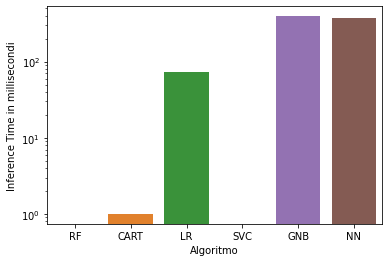

In [103]:
csv = read_csv("InfTimeReport.csv")
g = sbs.barplot(x=csv['Algoritmo'], y=csv['infAll'])
g.set_yscale("log")
plt.ylabel("Inference Time in millisecondi")
plt.show()

## Memoria Occupata

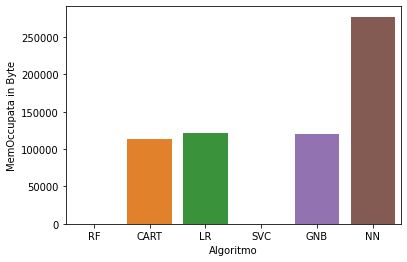

In [104]:
csv = read_csv("MemOccupationReport.csv")
sbs.barplot(x=csv['Algoritmo'], y=csv['MemAll'])
plt.ylabel("MemOccupata in Byte")
plt.show()